<a href="https://colab.research.google.com/github/DiAnCaceres/Minor-Machine-Learning/blob/main/iris_cluster_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [81]:
iris = pd.read_csv("/content/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [82]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [83]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [84]:
iris_no_etiquetas= iris.drop(["Species","Id"], 1)
iris_no_etiquetas=iris_no_etiquetas.sample(frac= 1)
iris_no_etiquetas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
36,5.5,3.5,1.3,0.2
125,7.2,3.2,6.0,1.8
143,6.8,3.2,5.9,2.3
48,5.3,3.7,1.5,0.2
77,6.7,3.0,5.0,1.7
...,...,...,...,...
56,6.3,3.3,4.7,1.6
10,5.4,3.7,1.5,0.2
114,5.8,2.8,5.1,2.4
29,4.7,3.2,1.6,0.2


In [85]:
iris_sample= iris_no_etiquetas.iloc[135:,:]
iris_no_etiquetas = iris_no_etiquetas.iloc[:135,:]
X = iris_no_etiquetas
X


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
36,5.5,3.5,1.3,0.2
125,7.2,3.2,6.0,1.8
143,6.8,3.2,5.9,2.3
48,5.3,3.7,1.5,0.2
77,6.7,3.0,5.0,1.7
...,...,...,...,...
61,5.9,3.0,4.2,1.5
11,4.8,3.4,1.6,0.2
73,6.1,2.8,4.7,1.2
22,4.6,3.6,1.0,0.2


In [86]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [87]:
X =np.array(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

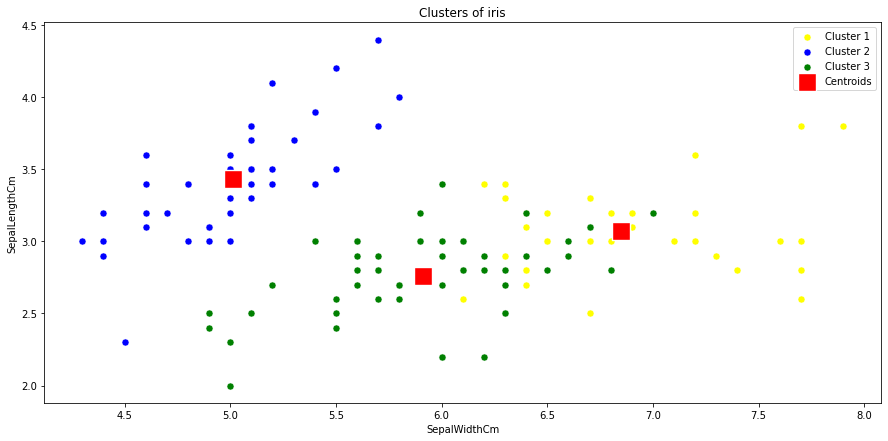

In [88]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of iris')
plt.xlabel('SepalWidthCm')
plt.ylabel('SepalLengthCm')
plt.legend()
plt.show()

In [89]:
iris_etiquetas_creadas = iris_no_etiquetas
iris_etiquetas_creadas["Cluster"] = y_kmeans

iris_etiquetas_creadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
36,5.5,3.5,1.3,0.2,1
125,7.2,3.2,6.0,1.8,0
143,6.8,3.2,5.9,2.3,0
48,5.3,3.7,1.5,0.2,1
77,6.7,3.0,5.0,1.7,0
...,...,...,...,...,...
61,5.9,3.0,4.2,1.5,2
11,4.8,3.4,1.6,0.2,1
73,6.1,2.8,4.7,1.2,2
22,4.6,3.6,1.0,0.2,1


In [90]:
X = iris_etiquetas_creadas.iloc[:,0:4]
y = iris_etiquetas_creadas.iloc[:,4:]


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [92]:
y_prediccion = knn.predict(iris_sample)
y_prediccion

array([2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2], dtype=int32)